In [34]:
function prehc(data)
  f,A,B=data.f,data.A,data.B
  function hc(p)
      x0,   f0,   ssize,   tleft,   eps =
    p.x0, p.f0, p.ssize, p.tleft, p.eps
#println("\n",p)
    while tleft>0 && abs(ssize)>=eps
      x1=x0+ssize;
      if !(A<=x1<=B) 
        ssize/=2
        continue;
      end
      f1=f(x1)
      tleft-=1
      if f1<f0
        x0=x1
        f0=f1
        continue
      end
      ssize/=2
    end # while
    (x0=x0,f0=f0,tleft=tleft,ssize=ssize)
  end
end

prehc (generic function with 1 method)

In [46]:
A=1;B=11;
# many local optimum
f(x)=(x-1)*(x-3)*(x-4)*(x-7)*(x-8)*(x-9)*(x-11)*sin(x*x)
dom=1:0.01:11;

# a 1-dim hill climbing

# random starting point
ISM=100
xek=zeros(ISM)
fek=zeros(ISM)
hc=prehc((f=f,A=A,B=B))
maxstep=2000
osszes=2*ISM*maxstep
for it=1:ISM
  x0=A+(B-A)*rand()
  f0=f(x0)
  outP=hc((x0=x0,f0=f0,tleft=maxstep,
        ssize=1.0,eps=1e-6))
  outN=hc((x0=x0,f0=f0,tleft=maxstep,
        ssize=-1.0,eps=1e-6))
  
  if outP.f0<outN.f0
    xek[it],fek[it]=outP.x0,outP.f0
  else
    xek[it],fek[it]=outN.x0,outN.f0
  end
  osszes-=(outN.tleft+outP.tleft)
  #  println("\n",x0," ",f0)
#  println("\n",out)
#  out=hc((x0=out.x0,f0=out.f0,tleft=out.tleft,
#      ssize=-0.5*out.ssize,eps=1e-12))
#  println("\n",out)
end

4143


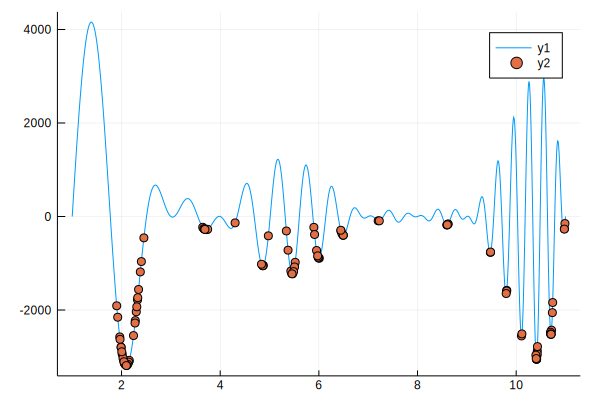

In [47]:
println(osszes)
using Plots
plot(dom,f.(dom))
plot!(xek,fek,seriestype=:scatter)
